In [86]:
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

### Read Data

In [2]:
with open(r'../data/json/subdivision/both.json', encoding='utf8', mode='r') as f:
    data_bo = json.load(f)

In [3]:
def readData(data):
    data_cold_hot = []
    data_keys = []
    for i in data.keys():
        temp = []
        for j in data[i].keys():
            if j == "User_Info":
                continue
            try:
                for k in data[i][j].keys():
                    if j+"_"+k not in data_keys:
                        data_keys.append(j+"_"+k)
                for x in data[i][j].values():
                    temp.append(x)
            except AttributeError:
                temp.append(data[i][j])
                if j not in data_keys:
                    data_keys.append(j)
        data_cold_hot.append(temp)
    data_cold_hot = np.array(data_cold_hot)
    data_keys = np.array(data_keys)
    return data_cold_hot,data_keys

In [4]:
data_both,data_both_keys = readData(data_bo)

In [5]:
def data_mapping(data,keys,key_word):
    find_data = []
    for i in range(len(keys)):
        if key_word in keys[i]:
            find_data.append(data[:,i])
    return np.array(find_data)

### T-test

In [8]:
data_both_keys

array(['Baseline_ERQ_Cognitive_Reappraisal',
       'Baseline_ERQ_Expressive_Suppression', 'Baseline_SMM_G',
       'Baseline_MAAS', 'Baseline_Math_Anxiety',
       'CognitiveData_Cold_Reaction', 'CognitiveData_Cold_Inhibition',
       'CognitiveData_Cold_Shifting', 'CognitiveData_Cold_Inversion',
       'CognitiveData_Cold_Memory', 'Pre_Cold_VAS', 'Pre_Cold_STAI',
       'Pre_Cold_PSS', 'Post_Cold_VAS', 'Post_Cold_STAI', 'Post_Cold_PSS',
       'Other_Cold_Threatening', 'Other_Cold_Ability',
       'Other_Cold_Confident', 'Other_Cold_Engagement',
       'Other_Cold_Excited', 'Other_Cold_Difficulty',
       'CognitiveData_Hot_Reaction', 'CognitiveData_Hot_Inhibition',
       'CognitiveData_Hot_Shifting', 'CognitiveData_Hot_Inversion',
       'CognitiveData_Hot_Memory', 'Pre_Hot_VAS', 'Pre_Hot_STAI',
       'Pre_Hot_PSS', 'Post_Hot_VAS', 'Post_Hot_STAI', 'Post_Hot_PSS',
       'Other_Hot_Threatening', 'Other_Hot_Ability',
       'Other_Hot_Confident', 'Other_Hot_Engagement', 'Other_Hot_

In [79]:
concatenate_key = ["Threatening","Ability","Confident","Engagement","Excited","Difficulty"]
other = []
for i in concatenate_key:
    temp = data_mapping(data_both,data_both_keys,i)
    other.append( np.hstack((temp[0],temp[1])))

In [69]:
# extract VAS & STAI & PSS
VAS = data_mapping(data_both,data_both_keys,"VAS")
STAI = data_mapping(data_both,data_both_keys,"STAI")
PSS = data_mapping(data_both,data_both_keys,"PSS")
VAS.shape

(4, 100)

In [70]:
pre_VAS = np.hstack((VAS[0], VAS[2]))
pre_STAI = np.hstack((STAI[0], STAI[2]))
pre_PASS = np.hstack((PSS[0], PSS[2]))
pre_VAS.shape

(200,)

In [71]:
post_VAS = np.hstack((VAS[1], VAS[3]))
post_STAI = np.hstack((STAI[1], STAI[3]))
post_PASS = np.hstack((PSS[1], PSS[3]))

In [113]:
stress = [pre_VAS,post_VAS,pre_STAI,post_STAI,pre_PASS,post_PASS]

In [96]:
keys = ['Baseline_ERQ_Cognitive_Reappraisal',
       'Baseline_ERQ_Expressive_Suppression', 'Baseline_SMM_G',
       'Baseline_MAAS', 'Baseline_Math_Anxiety',
       'Other_Cold_Threatening', 'Other_Cold_Ability',
       'Other_Cold_Confident', 'Other_Cold_Engagement',
       'Other_Cold_Excited', 'Other_Cold_Difficulty',
       'Other_Hot_Threatening', 'Other_Hot_Ability',
       'Other_Hot_Confident', 'Other_Hot_Engagement', 'Other_Hot_Excited',
       'Other_Hot_Difficulty']
index = ["pre_VAS","post_VAS","pre_STAI","post_STAI","pre_PASS","post_PASS"]

##### H0（原假设）：两列数据没有显著性差异。以95%的置信区间进行判定。

In [72]:
temp = data_both.T
std_mean = []
for i in range(len(temp)):
    std_mean.append([np.std(temp[i]) , np.mean(temp[i])])
std_mean = pd.DataFrame(std_mean,index=data_both_keys,columns=["std","mean"])
std_mean


,std,mean
Baseline_ERQ_Cognitive_Reappraisal,0.151458,0.557083
Baseline_ERQ_Expressive_Suppression,0.164767,0.374375
Baseline_SMM_G,0.154253,0.357187
Baseline_MAAS,0.192948,0.561857
Baseline_Math_Anxiety,0.286564,0.327500
CognitiveData_Cold_Reaction,0.157923,0.623330
CognitiveData_Cold_Inhibition,0.057529,0.898740
CognitiveData_Cold_Shifting,0.036125,0.904228
CognitiveData_Cold_Inversion,0.074778,0.904962
CognitiveData_Cold_Memory,0.079966,0.896891


In [116]:
# t-test

def stress_T(temp):
    result = []
    for i in range(6):
        result.append(np.array(stats.ttest_ind(temp, stress[i], equal_var = False)))
    return result

def T_test(value):
    result = {}

    if value == "both":
        for i in keys:
            temp = data_mapping(data_both, data_both_keys, i).T
            result[i] =  stress_T(temp)

    elif value == "other":
        for i in range(6):
            temp = other[i]
            result[concatenate_key[i]] =  stress_T(temp)

    elif value == "index":
        for i in range(6):
            temp = stress[i]
            result[index[i]] =  stress_T(temp)
    
        
    result = pd.DataFrame(result,index=index)
    return result

In [117]:
result = T_test("both")
res_value = result.values
# res_value = np.array(res_value)
for i in range(17):
    temp = []
    for j in range(6):
        if res_value[j,i][1] < 0.05:
            temp.append(index[j])
    print(keys[i],"---",temp)

Baseline_ERQ_Cognitive_Reappraisal --- ['pre_VAS', 'post_VAS', 'pre_STAI', 'post_STAI', 'pre_PASS', 'post_PASS']
Baseline_ERQ_Expressive_Suppression --- ['pre_VAS', 'post_VAS', 'pre_STAI', 'post_STAI']
Baseline_SMM_G --- ['pre_VAS', 'post_VAS', 'pre_STAI', 'post_STAI']
Baseline_MAAS --- ['pre_VAS', 'post_VAS', 'pre_STAI', 'post_STAI', 'pre_PASS', 'post_PASS']
Baseline_Math_Anxiety --- ['pre_VAS', 'post_VAS', 'pre_STAI']
Other_Cold_Threatening --- ['post_VAS', 'pre_STAI', 'post_STAI', 'pre_PASS', 'post_PASS']
Other_Cold_Ability --- ['pre_VAS', 'post_VAS', 'pre_STAI', 'post_STAI', 'pre_PASS', 'post_PASS']
Other_Cold_Confident --- ['pre_VAS', 'post_VAS', 'pre_STAI', 'post_STAI', 'pre_PASS', 'post_PASS']
Other_Cold_Engagement --- ['pre_VAS', 'post_VAS', 'pre_STAI', 'post_STAI', 'pre_PASS', 'post_PASS']
Other_Cold_Excited --- ['pre_VAS', 'post_VAS', 'pre_PASS', 'post_PASS']
Other_Cold_Difficulty --- ['pre_VAS', 'post_VAS', 'pre_STAI', 'post_STAI', 'pre_PASS', 'post_PASS']
Other_Hot_Threaten

In [124]:
result = T_test("index")
res_value = result.values
heatMap = []
# res_value = np.array(res_value)
for i in range(6):
    temp = []
    temp_heatMap = []
    for j in range(6):
        temp_heatMap.append(res_value[j,i][1])
        if res_value[j,i][1] < 0.05:
            temp.append(index[j])
    heatMap.append(temp_heatMap)
    print(index[i],"---",temp)

pre_VAS --- ['post_VAS', 'pre_STAI', 'post_STAI', 'pre_PASS', 'post_PASS']
post_VAS --- ['pre_VAS', 'pre_STAI', 'post_STAI', 'pre_PASS', 'post_PASS']
pre_STAI --- ['pre_VAS', 'post_VAS', 'post_STAI', 'pre_PASS', 'post_PASS']
post_STAI --- ['pre_VAS', 'post_VAS', 'pre_STAI', 'pre_PASS', 'post_PASS']
pre_PASS --- ['pre_VAS', 'post_VAS', 'pre_STAI', 'post_STAI']
post_PASS --- ['pre_VAS', 'post_VAS', 'pre_STAI', 'post_STAI']


<AxesSubplot:>

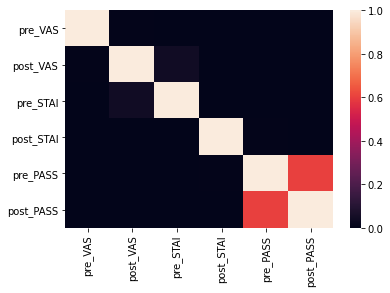

In [130]:

sns.heatmap(pd.DataFrame(heatMap,index=index,columns=index))
